In [2]:
import pandas as pd

In [3]:
no_metro = pd.read_csv('../Data/clean-metro-sales-aux-exc.csv', low_memory = False)

In [4]:
no_metro.columns

Index(['funding_status', 'school_charter', 'school_magnet', 'school_kipp',
       'school_nlns', 'school_year_round', 'school_charter_ready_promise',
       'teacher_prefix', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'primary_focus_subject',
       'primary_focus_area', 'resource_type', 'poverty_level', 'grade_level',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'total_donations', 'num_donors', 'eligible_double_your_impact_match',
       'eligible_almost_home_match'],
      dtype='object')

In [5]:
no_metro = no_metro[['funding_status', 'primary_focus_subject', 'primary_focus_area', 'resource_type', 'grade_level', 'total_price_excluding_optional_support', 'total_price_including_optional_support']]

In [6]:
X = no_metro.drop('funding_status', axis=1)
y = no_metro['funding_status']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [8]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#To assign KNN, we loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []

for k in range(21, 40, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'k: {k}, Train/Test Score: {train_score}/{test_score}')

k: 21, Train/Test Score: 0.7238506110260838/0.6983213749139977
k: 23, Train/Test Score: 0.7226699803891283/0.6991111922380264
k: 25, Train/Test Score: 0.7218462301726599/0.7002344879877561
k: 27, Train/Test Score: 0.7208446247958176/0.7008101770594926
k: 29, Train/Test Score: 0.719912055303594/0.7015859531866496
k: 31, Train/Test Score: 0.7193211549352467/0.7017895505412881
k: 33, Train/Test Score: 0.7187045123726347/0.7026039399598422
k: 35, Train/Test Score: 0.7182867867657039/0.7030286861652087
k: 37, Train/Test Score: 0.7178842724553841/0.7031199539448743
k: 39, Train/Test Score: 0.7173940006646167/0.7033972675830887


In [10]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#To assign KNN, we loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []

for k in range(41, 60, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'k: {k}, Train/Test Score: {train_score}/{test_score}')

k: 41, Train/Test Score: 0.7169165999709816/0.7037693593001868
k: 43, Train/Test Score: 0.7167492757082614/0.7038009519931478
k: 45, Train/Test Score: 0.7163572922955953/0.7042888835844368
k: 47, Train/Test Score: 0.7160401952662445/0.7040080596470043
k: 49, Train/Test Score: 0.7160355148672873/0.7043661101672306
k: 51, Train/Test Score: 0.7157968145204697/0.704611831112484
k: 53, Train/Test Score: 0.7154762071919011/0.7048926550499165
k: 55, Train/Test Score: 0.7153229241260525/0.7052015613810921
k: 57, Train/Test Score: 0.7151438988659393/0.7052507055701428
k: 59, Train/Test Score: 0.7148817965243357/0.7052120922787458


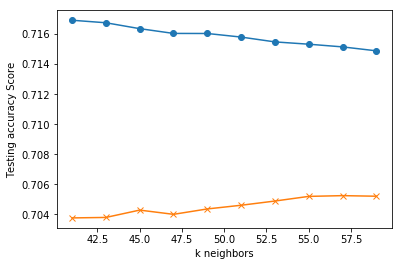

In [12]:
import matplotlib.pyplot as plt    
#You can also plot it if you want to have a look at it
plt.plot(range(41, 60, 2), train_scores, marker='o')
plt.plot(range(41, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
#We predict using the value of k where train and test converge
knn = KNeighborsClassifier(n_neighbors=57)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.705


In [14]:
#Predict a value
predicted = knn.predict(X_test)

from sklearn.metrics import roc_auc_score
rocauc = roc_auc_score(y_test, predicted)

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, predicted)


from sklearn.metrics import log_loss
from math import exp

lol = log_loss(y_test, predicted)

print(rocauc, average_precision, exp(lol))

0.5542509511617415 0.7229732783316253 26383.080579882873


[[ 15031  70622]
 [ 13345 185878]]


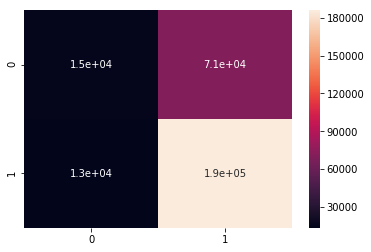

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,predicted)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()